## imports



In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Task 1  

Perform EDA and feature selection

## 1 - Check and handle for duplicates & null values. [ 0.5 pts ]


In [2]:
data = pd.read_csv('/content/MBA.csv')
data

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [4]:
data.describe()

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


In [16]:
data.drop_duplicates(inplace= True)
data

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN


In [24]:
missing_value= data.isnull().sum()
missing_value

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,1842
gmat,0
work_exp,0
work_industry,0
admission,5194


In [42]:
data['admission'] = data['admission'].apply(lambda x: 1 if x == 'Admit' else 0)

In [43]:
data.head(10)

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,1
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,0
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,1
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,0
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,0
5,6,Male,False,3.18,Business,White,610.0,6.0,Consulting,0
6,7,Female,False,2.93,STEM,Other,590.0,3.0,Technology,1
7,8,Male,True,3.02,Business,NaN,630.0,6.0,Financial Services,0
8,9,Male,False,3.24,Business,White,590.0,2.0,Nonprofit/Gov,0
9,10,Male,False,3.27,Humanities,Asian,690.0,3.0,Consulting,0


## 2- Check for outliers using two different methods and plot them, explain how you will handle them and why [ 1 pts ]

In [26]:
z_score = np.abs(zscore(data.select_dtypes(include=[np.number])))
outlires = (z_score >3).sum(axis=1)
data=data[outlires==0]

In [27]:
data.head(20)

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
5,6,Male,False,3.18,Business,White,610.0,6.0,Consulting,NaN
6,7,Female,False,2.93,STEM,Other,590.0,3.0,Technology,Admit
7,8,Male,True,3.02,Business,NaN,630.0,6.0,Financial Services,NaN
8,9,Male,False,3.24,Business,White,590.0,2.0,Nonprofit/Gov,NaN
9,10,Male,False,3.27,Humanities,Asian,690.0,3.0,Consulting,NaN


In [31]:
print(data.describe)

<bound method NDFrame.describe of       application_id  gender  international   gpa       major      race  \
0                  1  Female          False  3.30    Business     Asian   
1                  2    Male          False  3.28  Humanities     Black   
2                  3  Female           True  3.30    Business       NaN   
3                  4    Male          False  3.47        STEM     Black   
4                  5    Male          False  3.35        STEM  Hispanic   
...              ...     ...            ...   ...         ...       ...   
6189            6190    Male          False  3.49    Business     White   
6190            6191    Male          False  3.18        STEM     Black   
6191            6192  Female           True  3.22    Business       NaN   
6192            6193    Male           True  3.36    Business       NaN   
6193            6194    Male          False  3.23        STEM  Hispanic   

       gmat  work_exp          work_industry admission  
0     62

## 3 - Plot the target variable distribution [ 0.5 pts ]

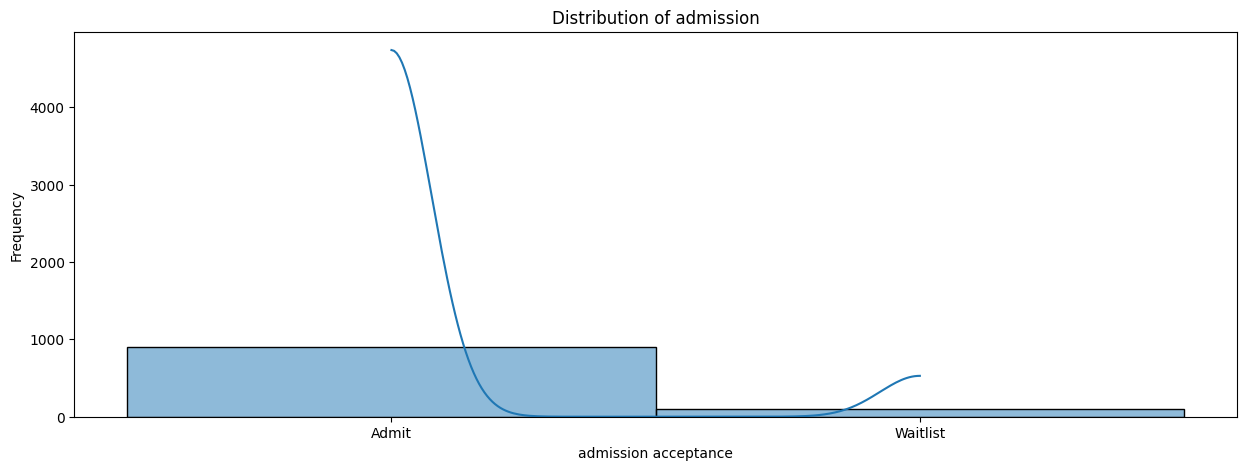

In [37]:
g =plt.figure(figsize=(15,5))
sns.histplot(data['admission'], bins=2, kde=True)
plt.title('Distribution of admission')
plt.xlabel('admission acceptance')
plt.ylabel('Frequency')
plt.show()

## 4 - Plot and explain variables distributions ( at least 3 variables) [ 1 pts ]

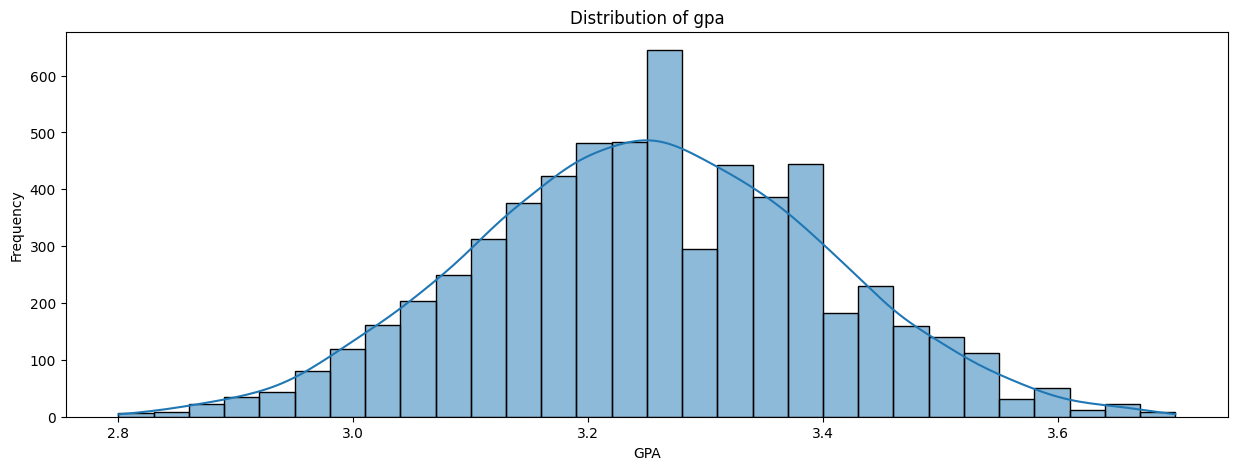

In [34]:
g =plt.figure(figsize=(15,5))
sns.histplot(data['gpa'], bins=30, kde=True)
plt.title('Distribution of gpa')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

THe GPA dist. is normaly distributed

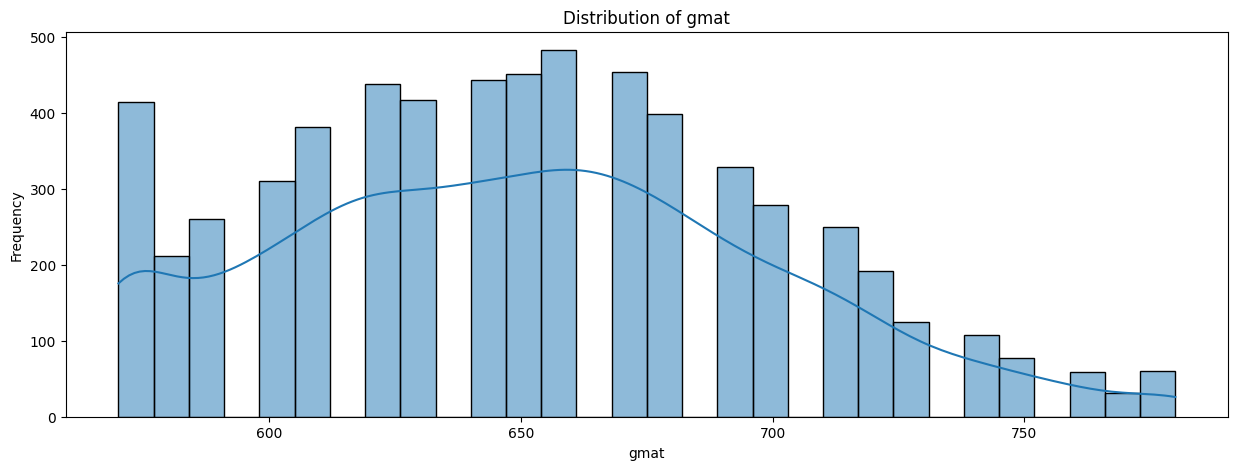

In [35]:
g =plt.figure(figsize=(15,5))
sns.histplot(data['gmat'], bins=30, kde=True)
plt.title('Distribution of gmat')
plt.xlabel('gmat')
plt.ylabel('Frequency')
plt.show()

there is some skewness, and the feature is lass important

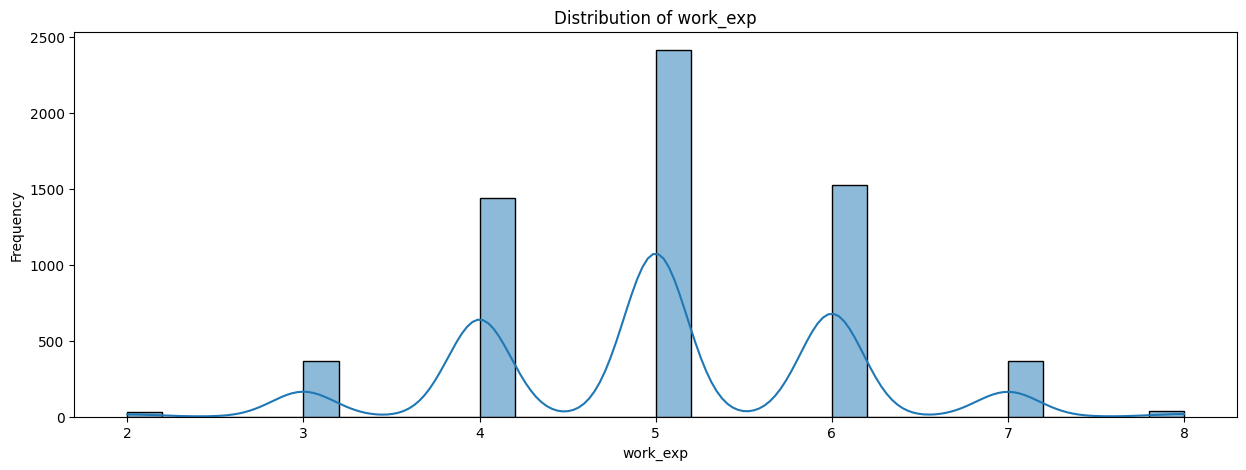

In [38]:
g =plt.figure(figsize=(15,5))
sns.histplot(data['work_exp'], bins=30, kde=True)
plt.title('Distribution of work_exp')
plt.xlabel('work_exp')
plt.ylabel('Frequency')
plt.show()

## 5 - Apply any Warper method (as explained in the tutorials) to find the most 5 valuable features, and comment on them  [ 2 pts ]

In [51]:
le = LabelEncoder()
data['work_industry'] = le.fit_transform(data['work_industry'])
data['major'] = le.fit_transform(data['major'])
data['international'] = le.fit_transform(data['international'])
data['gender'] = le.fit_transform(data['gender'])
data['race'] = le.fit_transform(data['race'])


In [55]:
data.head(5)

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,0,0,3.30,0,0,620.0,3.0,3,1
1,2,1,0,3.28,1,1,680.0,5.0,6,0
2,3,0,1,3.30,0,5,710.0,5.0,13,1
3,4,1,0,3.47,2,1,690.0,6.0,13,0
4,5,1,0,3.35,2,2,590.0,5.0,1,0


In [53]:
numerical_features = data.select_dtypes(include=np.number)

In [56]:
correlation = numerical_features.corr()['admission'].drop('admission').sort_values(ascending=False)
correlation.head(5)

,admission
gmat,0.348234
gpa,0.284664
race,0.027600
work_exp,0.014456
international,0.011125


They are the top 5 valuble features based on the correlation between every col and the target col.

# Task 2

Using a Logistic Regression model with all the features, do the following

## 1 - Plot the precision-recall curve, use it to calculate AUC, and explain it in detail.  [ 1 pts ]
hint: drop the “whitelist” to become binary classification.


In [65]:
data.shape

(6173, 10)

In [67]:
data['gpa'].shape

(6173,)

In [68]:
x= data.drop(columns='admission')
y= data['admission']

In [69]:
x.shape

(6173, 9)

In [70]:
y.shape


(6173,)

In [71]:
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

## 2 -  Use variance inflation factor to identify any significant multi-collinearity, explain criteria in detail [ 2 pts ]

## 3 - Calculate Cook’s distance, and plot it with the observations, explain the graph [ 2 pts ]